# Statistics with Python
## Why Python for statistics?
R is a language dedicated to statistics. Python is a general-purpose language with statistics modules. R has
more statistical analysis features than Python, and specialized syntaxes. However, when it comes to building
complex analysis pipelines that mix statistics with e.g. image analysis, text mining, or control of a physical
experiment, the richness of Python is an invaluable asset.

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set_style('whitegrid')

## Descriptive Statistics

In [91]:
path_to_diabetes = '..\\datasets\\diabetes.csv'
diabetes = pd.DataFrame.from_csv(path=path_to_diabetes, index_col=None)

#### Data set information:
from http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/Cdiabetes.html
<table border="">
<tbody><tr><td>Name</td><td>Labels</td><td>Units</td><td>Levels</td><td>Storage</td><td>NAs</td></tr>
<tr><td>id</td><td>Subject ID</td><td></td><td><div align="right"></div></td><td>double</td><td><div align="right">  0</div></td></tr>
<tr><td>chol</td><td>Total Cholesterol</td><td></td><td><div align="right"></div></td><td>double</td><td><div align="right">  1</div></td></tr>
<tr><td>stab.glu</td><td>Stabilized Glucose</td><td></td><td><div align="right"></div></td><td>double</td><td><div align="right">  0</div></td></tr>
<tr><td>hdl</td><td>High Density Lipoprotein</td><td></td><td><div align="right"></div></td><td>double</td><td><div align="right">  1</div></td></tr>
<tr><td>ratio</td><td>Cholesterol/HDL Ratio</td><td></td><td><div align="right"></div></td><td>double</td><td><div align="right">  1</div></td></tr>
<tr><td>glyhb</td><td>Glycosolated Hemoglobin</td><td></td><td><div align="right"></div></td><td>double</td><td><div align="right"> 13</div></td></tr>
<tr><td>location</td><td></td><td></td><td><a href="#location"><div align="right">2</div></a></td><td>integer</td><td><div align="right">  0</div></td></tr>
<tr><td>age</td><td></td><td>years</td><td><div align="right"></div></td><td>double</td><td><div align="right">  0</div></td></tr>
<tr><td>gender</td><td></td><td></td><td><a href="#gender"><div align="right">2</div></a></td><td>integer</td><td><div align="right">  0</div></td></tr>
<tr><td>height</td><td></td><td>inches</td><td><div align="right"></div></td><td>double</td><td><div align="right">  5</div></td></tr>
<tr><td>weight</td><td></td><td>pounds</td><td><div align="right"></div></td><td>double</td><td><div align="right">  1</div></td></tr>
<tr><td>frame</td><td></td><td></td><td><a href="#frame"><div align="right">3</div></a></td><td>integer</td><td><div align="right"> 12</div></td></tr>
<tr><td>bp.1s</td><td>First Systolic Blood Pressure</td><td></td><td><div align="right"></div></td><td>double</td><td><div align="right">  5</div></td></tr>
<tr><td>bp.1d</td><td>First Diastolic Blood Pressure</td><td></td><td><div align="right"></div></td><td>double</td><td><div align="right">  5</div>
<tr><td>waist</td><td></td><td>inches</td><td><div align="right"></div></td><td>double</td><td><div align="right">  2</div></td></tr>
<tr><td>hip</td><td></td><td>inches</td><td><div align="right"></div></td><td>double</td><td><div align="right">  2</div></td></tr>
<tr><td>time.ppn</td><td>Postprandial Time when Labs were Drawn</td><td>minutes</td><td><div align="right"></div></td><td>double</td><td><div align="right">  3</div></td></tr>
</tbody></table>

In [92]:
# Some data pre-processing
for col in diabetes.columns:
    if diabetes[col].dtype != 'object':
        diabetes[col].fillna(diabetes[col].median(), inplace=True)

diabetes['frame'].fillna(value='medium', inplace=True)
diabetes['height'] = 2.54*diabetes['height'] # to cm
diabetes['waist'] = 2.54*diabetes['waist'] # to cm
diabetes['hip'] = 2.54*diabetes['hip'] # to cm
diabetes['weight'] = 0.454*diabetes['weight'] # to kg

### Some context:

* **Total cholesterol** (Cholesterol): a measure of the total amount of cholesterol in your blood, including low-density lipoprotein (LDL) cholesterol and high-density lipoprotein (HDL) cholesterol.
* **HDL (good) cholesterol** (hdl): HDL helps remove cholesterol from your arteries.
* **LDL (bad) cholesterol**: The main source of cholesterol buildup and blockage in the arteries.
* **Glycosolated Hemoglobin** (glyhb): In patients with diabetes, higher amounts of glycated hemoglobin, indicating poorer control of blood glucose levels, have been associated with cardiovascular disease, nephropathy, neuropathy, and retinopathy.

<table width="600" border="0" cellspacing="3" cellpadding="3" summary="how your cholesterol numbers compare to the table below">
<thead>
  <tr>
    <th scope="col" id="C1" bgcolor="#006699"><h3 style="color:#fff;">Total Cholesterol Level</h3></th>
    <th scope="col" id="C2" bgcolor="#006699"><h3 style="color:#fff;">Category</h3></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td id="C1 R1" class="Optimal">Less than 200mg/dL</td>
    <td id="C2 R1" class="Optimal">Desirable</td>
  </tr>
  <tr>
    <td id="C1 R2" class="Borderline">200-239 mg/dL</td>
    <td id="C2 R2" class="Borderline">Borderline high</td>
  </tr>

  <tr>
    <td id="C1 R3" class="High">240mg/dL and above</td>
    <td id="C2 R3" class="High">High</td>
  </tr>
</tbody>
  <tbody><tr>
    <td>&nbsp;</td>
    <td>&nbsp;</td>
  </tr>
</tbody><thead>
  <tr>
    <th scope="col" bgcolor="#006699" id="C3"><h3 style="color:#fff;">LDL (Bad) Cholesterol Level</h3></th>
    <th scope="col" bgcolor="#006699" id="C4"><h3 style="color:#fff;">LDL Cholesterol Category</h3></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td id="C3 R4" class="Optimal">Less than 100mg/dL</td>
    <td id="C4 R4" class="Optimal">Optimal</td>
  </tr>
  <tr>
    <td id="C3 R5" class="Nearoptimal">100-129mg/dL</td>
    <td id="C4 R5" class="Nearoptimal">Near optimal/above optimal</td>
  </tr>
  <tr>
    <td id="C3 R6" class="Borderline">130-159 mg/dL</td>
    <td id="C4 R6" class="Borderline">Borderline high</td>
  </tr>
  <tr>
    <td id="C3 R7" class="High">160-189 mg/dL</td>
    <td id="C4 R7" class="High">High</td>
  </tr>
  <tr>
    <td id="C3 R8" class="VeryHigh">190 mg/dL and above</td>
    <td id="C4 R8" class="VeryHigh">Very High</td>
  </tr>
</tbody>
  <tbody><tr>
    <td>&nbsp;</td>
    <td>&nbsp;</td>
  </tr>
</tbody><thead>
  <tr>
    <th scope="col" bgcolor="#006699" id="C5"><h3 style="color:#fff;">HDL (Good) Cholesterol Level</h3></th>
    <th scope="col" bgcolor="#006699" id="C6"><h3 style="color:#fff;">HDL Cholesterol Category</h3></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td id="C5 R9" class="VeryHigh">Less than 40 mg/dL</td>
    <td id="C6 R9" class="VeryHigh">A major risk factor for heart disease</td>
  </tr>
  <tr>
    <td id="C5 R10" class="Nearoptimal">40—59 mg/dL</td>
    <td id="C6 R10" class="Nearoptimal">The higher, the better</td>
  </tr>
  <tr>
    <td id="C5 R11" class="Optimal">60 mg/dL and higher</td>
    <td id="C6 R11" class="Optimal">Considered protective against heart disease</td>
  </tr>
</tbody>
</table>

** Simplifying assumption for this demonstration: Total Cholesterol = good cholesterol + bad cholesterol **

In [93]:
diabetes.rename(columns={'hdl':'good_chol', 'Cholesterol':'total_chol'}, inplace=True)
diabetes['bad_chol'] = diabetes['total_chol'] - diabetes['good_chol']

### Univariate Analysis

#### Describe the distributions of total, good and bad cholesterol, among diabetic patients. Compare them with the levels of the table

In [49]:
diabetes[['total_chol','good_chol','bad_chol']].describe()

,total_chol,good_chol,bad_chol
count,403.000000,403.000000,403.000000
mean,207.836228,50.434243,157.401985
std,44.390656,17.242563,44.521415
min,78.000000,12.000000,57.000000
25%,179.000000,38.000000,127.000000
50%,204.000000,46.000000,152.000000
75%,230.000000,59.000000,180.000000
max,443.000000,120.000000,420.000000


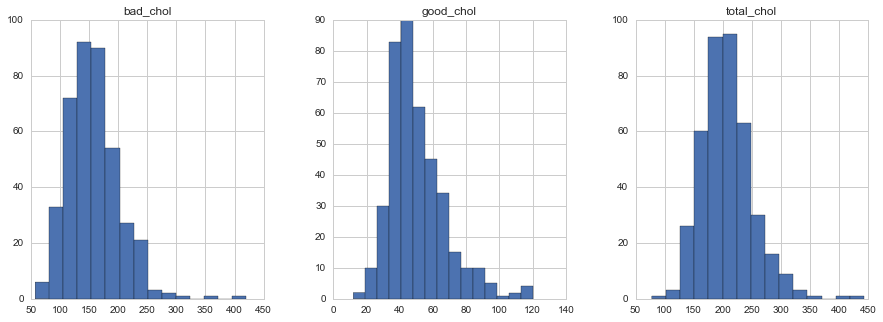

In [56]:
diabetes[['total_chol','good_chol','bad_chol']].hist(figsize=(15,5) ,layout=(1,3), bins=15);

**How many people have a "Desirable" level of total cholesterol?**

In [57]:
(diabetes['total_chol'] < 200).sum()

184

**How many people have a "Very high" level of bad cholesterol?**

In [58]:
(diabetes['bad_chol'] > 190).sum()

77

### Interpreting percentiles

In [66]:
diabetes[['total_chol','good_chol','bad_chol']].quantile(q=np.arange(0.05, 1, 0.05))

,total_chol,good_chol,bad_chol
0.05,145.0,30.0,97.0
0.10,158.0,33.0,106.0
0.15,165.0,35.0,116.0
0.20,173.0,36.0,121.0
0.25,179.0,38.0,127.0
0.30,183.0,40.0,133.0
0.35,190.0,42.0,138.0
0.40,194.0,44.0,142.0
0.45,199.0,45.0,147.0
0.50,204.0,46.0,152.0


### Bivariate Analysis

#### What can we say about the levels of all kinds of cholesterol among genders?

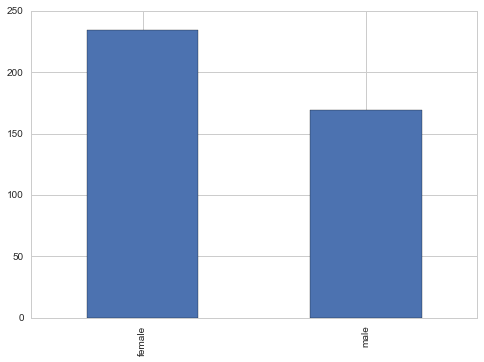

In [68]:
diabetes['gender'].value_counts().plot(kind='bar');

In [70]:
chol_vars = ['total_chol','good_chol','bad_chol']

In [77]:
diabetes.groupby('gender')[chol_vars].agg([np.mean,np.std,np.size])

total_chol                    good_chol                      bad_chol  \
              mean        std   size       mean        std   size        mean   
gender                                                                          
female  208.435897  43.747105  234.0  52.111111  17.255106  234.0  156.324786   
male    207.005917  45.384272  169.0  48.112426  17.004002  169.0  158.893491   

                          
              std   size  
gender                    
female  43.372492  234.0  
male    46.153605  169.0

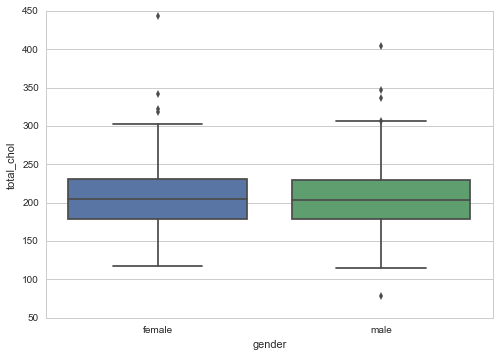

In [79]:
sns.boxplot(x='gender', y='total_chol', data=diabetes);

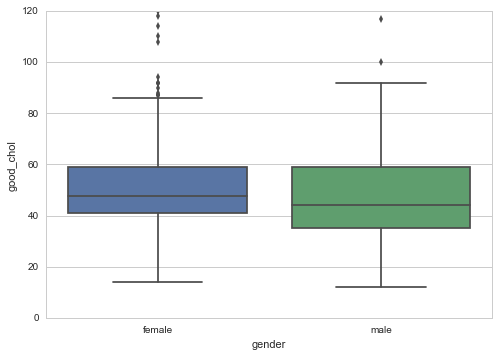

In [80]:
sns.boxplot(x='gender', y='good_chol', data=diabetes);

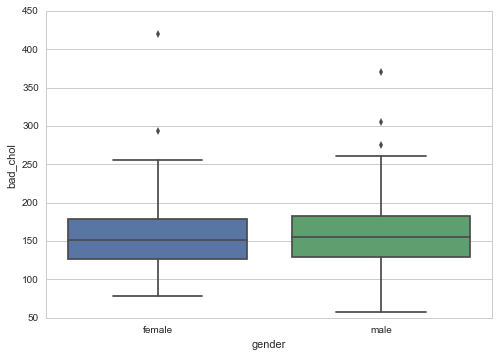

In [89]:
sns.boxplot(x='gender', y='bad_chol', data=diabetes);

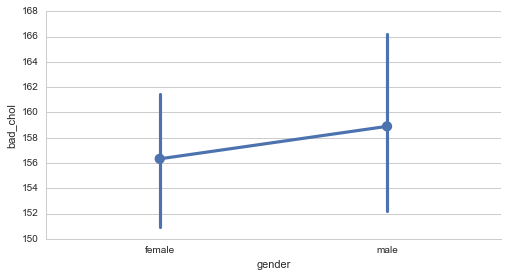

In [98]:
sns.factorplot(x='gender', y='bad_chol', data=diabetes, aspect=1.8);

#### Find the proportion of people with "Desirable" levels of total cholesterol for each gender.

In [83]:
diabetes.groupby(['gender',diabetes['total_chol']<200]).size().unstack()

total_chol,False,True
gender,,
female,129,105
male,90,79


In [86]:
# Proportion for females
105.0/(129+105)

0.44871794871794873

In [87]:
# Proportion for males
79.0/(79+90)

0.46745562130177515

### Correlation

Correlation is a statistical measure that indicates the extent to which two or more variables fluctuate together. A positive correlation indicates the extent to which those variables increase or decrease in parallel; a negative correlation indicates the extent to which one variable increases as the other decreases.

### What is the relatioship between bad and good cholesterol? What about those variables and glyhb?

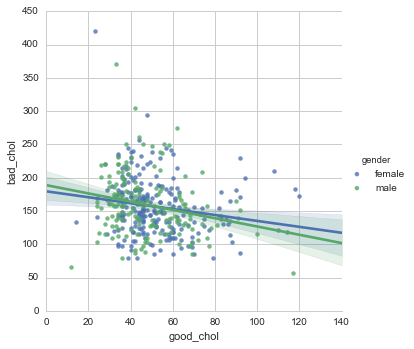

In [103]:
sns.lmplot(x='good_chol', y='bad_chol', hue='gender', data=diabetes);

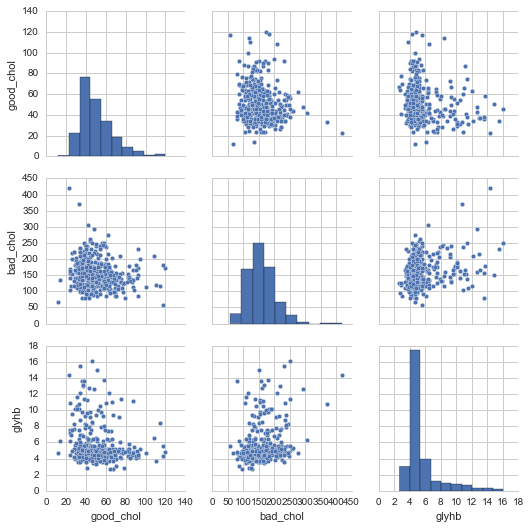

In [110]:
sns.pairplot(diabetes[['good_chol','bad_chol','glyhb']])

In [105]:
diabetes.columns

Index([u'id', u'total_chol', u'stab.glu', u'good_chol', u'ratio', u'glyhb',
       u'age', u'gender', u'height', u'weight', u'frame', u'bp.1s', u'bp.1d',
       u'waist', u'hip', u'time.ppn', u'bad_chol'],
      dtype='object')

In [114]:
diabetes[['good_chol','bad_chol','glyhb']].corr()

,good_chol,bad_chol,glyhb
good_chol,1.000000,-0.201216,-0.149724
bad_chol,-0.201216,1.000000,0.297151
glyhb,-0.149724,0.297151,1.000000


### Do the correlations change for each gender?

In [113]:
diabetes.groupby('gender')[['good_chol','bad_chol','glyhb']].corr()

good_chol  bad_chol     glyhb
gender                                         
female good_chol   1.000000 -0.177114 -0.072095
       bad_chol   -0.177114  1.000000  0.358931
       glyhb      -0.072095  0.358931  1.000000
male   good_chol   1.000000 -0.229078 -0.238937
       bad_chol   -0.229078  1.000000  0.222940
       glyhb      -0.238937  0.222940  1.000000

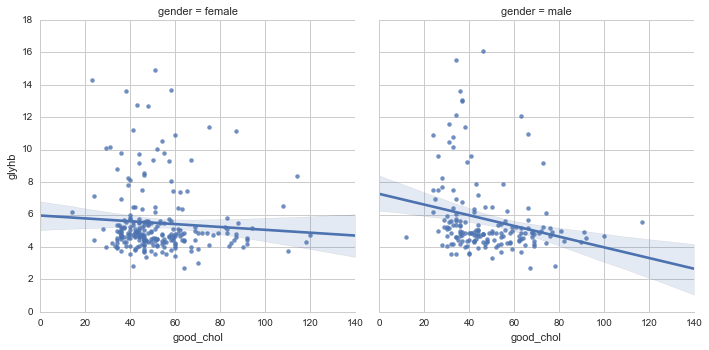

In [134]:
sns.lmplot(x='good_chol', y='glyhb', col='gender', data=diabetes)

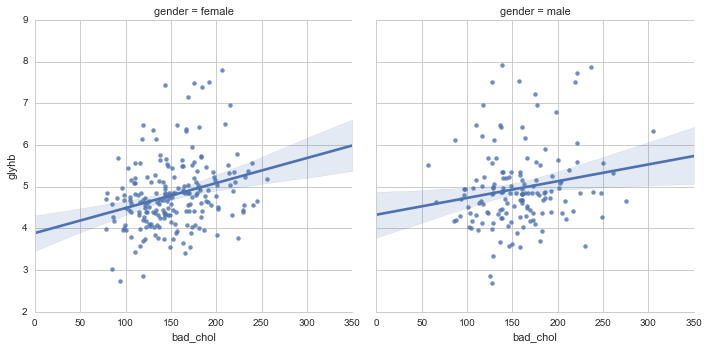

In [136]:
sns.lmplot(x='bad_chol', y='glyhb', col='gender', data=diabetes[diabetes.glyhb<8])

### Outlier detection

### heuristic approach:
1. Classify as outliers points outside the interval $[Q1 - 1.5IQR,Q3 + 1.5IQR]$
2. For distribution close to the Normal Distribution, classify as outliers points outside the interval $[mean-3.5sd,mean+3.5sd]$

In [124]:
def detect_outliers(series):
    Q1, Q3 = series.quantile(q=np.array([0.25,0.75]))
    IQR = Q3 - Q1
    sd = series.std()
    m = series.mean()
    tukey = series[(series < (Q1-1.5*IQR)) | (series > (Q3+1.5*IQR))]
    normal = series[(series < (m-3.5*sd)) | (series > (m+3.5*sd))]
    return {'Tukey':tukey, 'Normal':normal}

In [127]:
print detect_outliers(diabetes.total_chol)['Tukey']
print detect_outliers(diabetes.total_chol)['Normal']

3       78.0
62     443.0
133    318.0
147    347.0
212    342.0
294    404.0
359    307.0
377    337.0
380    322.0
Name: total_chol, dtype: float64
62     443.0
294    404.0
Name: total_chol, dtype: float64


In [130]:
diabetes[chol_vars].apply(detect_outliers)

total_chol    {u'Tukey': [78.0, 443.0, 318.0, 347.0, 342.0, ...
good_chol     {u'Tukey': [92.0, 114.0, 94.0, 108.0, 92.0, 12...
bad_chol      {u'Tukey': [420.0, 305.0, 294.0, 261.0, 371.0,...
dtype: object

## Statistical distributions in Python

### Random Variable
> a variable whose value is subject to variations due to chance (i.e. randomness, in a mathematical sense). A random variable can take on a set of possible different values (similarly to other mathematical variables), each with an associated probability [wiki](https://en.wikipedia.org/wiki/Random_variable)

**Types**

1. Discrete Random Variables <br>
    Eg: Genders of the buyers buying shoe
2. Continuous Random Variables <br>
    Eg: Shoe Sales in a quarter
    
### Probability Distribution
> Assigns a probability to each measurable subset of the possible outcomes of a random experiment, survey, or procedure of statistical inference. [wiki](https://en.wikipedia.org/wiki/Probability_distribution)

#### Probability Mass Function (pmf)
probability mass function (pmf) is a function that gives the probability that a discrete random variable is exactly equal to some value

#### Probability Density Function (pdf)
A probability density function (PDF), or density of a continuous random variable, is a function that describes the relative likelihood for this random variable to take on a given value.

#### Cumulative Distribution function (cdf)
In probability theory and statistics, the cumulative distribution function (CDF) of a real-valued random variable X, or just distribution function of X, evaluated at x, is the probability that X will take a value less than or equal to x.
In the case of a continuous distribution, it gives the area under the probability density function from minus infinity to x.

In [169]:
from scipy import stats

Documentation for the `stats` scipy package: http://docs.scipy.org/doc/scipy/reference/stats.html

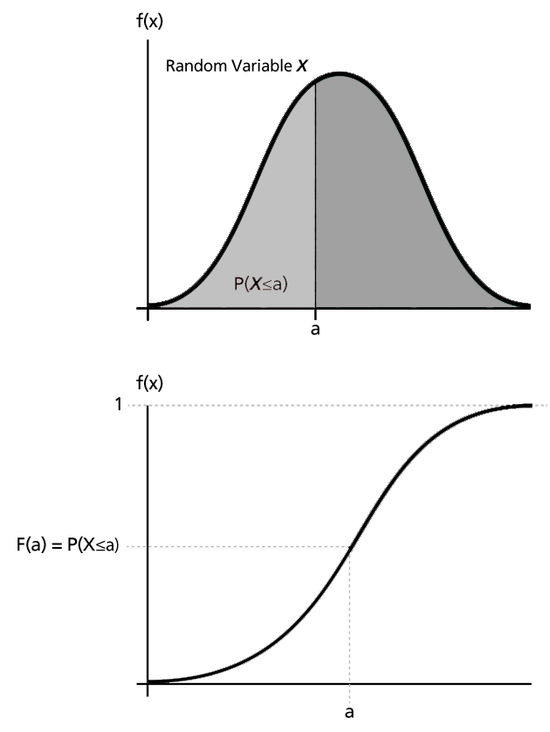

In [172]:
from IPython.display import Image
Image("img/cdfpdf.png")

In [217]:
print stats.norm.pdf(0)
print stats.norm.cdf(0)
print stats.norm.ppf(0.5) # inverse cdf
print stats.norm.interval(0.95) # 95% interval around the median
print stats.norm.rvs(1)

0.398942280401
0.5
0.0
(-1.959963984540054, 1.959963984540054)
0.175166270655


## Inferencial Statistics: Estimation and Distributions

### Population vs. Sample

Technically a sample is any subset from the population. In practice is a set of data collected and/or selected from a statistical population by a **defined procedure**. The elements of a sample are known as sample points, sampling units or observations.

Why do we need to work with samples samples?

Typically, the population is very large, making a census or a complete enumeration of all the values in the population is either impractical or impossible.

A good sampling procedure extracts a sample that reflects the main characteristics of the **population**.

#### Statistical inference

Statistical inference is the process of deducing properties of an underlying distribution by analysis of data. Inferential statistical analysis infers properties about a population: this includes testing hypotheses and deriving estimates. The population is assumed to be larger than the observed data set; in other words, the observed data is assumed to be sampled from a larger population.

In [154]:
samples = np.round(np.random.normal(loc=100, scale=10, size=(60,10)),1)
samples = pd.DataFrame(data=samples, columns=['sample_' + str(i+1) for i in range(10)])
samples.head()

,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,sample_10
0,102.6,103.6,92.8,94.3,113.9,92.6,96.3,102.1,100.4,118.4
1,105.3,99.3,112.3,122.3,112.0,112.1,100.3,100.6,93.3,101.3
2,97.0,102.5,86.9,104.0,106.1,74.8,107.4,95.7,114.6,115.7
3,85.7,83.1,86.5,104.2,113.0,99.8,115.6,95.3,113.4,90.2
4,111.0,112.4,114.8,92.7,90.3,113.0,103.7,103.2,100.8,101.9


In [155]:
samples.mean()

sample_1      99.256667
sample_2     101.023333
sample_3      99.293333
sample_4      99.875000
sample_5     100.320000
sample_6     100.921667
sample_7      99.748333
sample_8     100.666667
sample_9     100.133333
sample_10    100.940000
dtype: float64

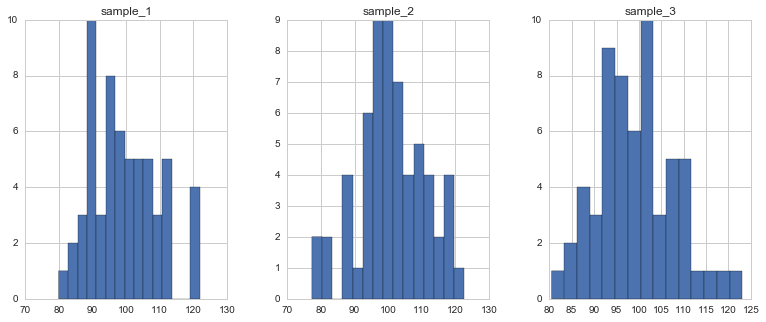

In [156]:
samples[['sample_1','sample_2','sample_3']].hist(figsize=(13,5), layout=(1,3), bins=15);

#### Estimating population parameters

Sometimes you are only interested in very specific population characteristics. Most commonly we would like to infer something about the tipical value observed in the population (the mean) or the dispersion of the observations in the population.
In classical statistis, there are two types of estimations:

* **A point estimate**: a particular value that best approximates some parameter of interest.
* **An interval estimate**: a confidence interval (or set estimate), i.e. an interval constructed using a dataset drawn from a population so that, under repeated sampling of such datasets, such intervals would contain the true parameter value with the probability at the stated confidence level.

There are many ways to estimate parameters from the population, in classical statistics, some of the most known approaches are:

* Method of moments
* Maximum likelihood estimation
* Bootstrap

#### Estimate the population means and standard deviations for the cholesterol variables.

In [161]:
diabetes[chol_vars].mean()

total_chol    207.836228
good_chol      50.434243
bad_chol      157.401985
dtype: float64

In [164]:
diabetes[chol_vars].std()

total_chol    44.390656
good_chol     17.242563
bad_chol      44.521415
dtype: float64

In [166]:
diabetes.groupby('gender')[chol_vars].agg([np.mean, np.std])

total_chol             good_chol               bad_chol           
              mean        std       mean        std        mean        std
gender                                                                    
female  208.435897  43.747105  52.111111  17.255106  156.324786  43.372492
male    207.005917  45.384272  48.112426  17.004002  158.893491  46.153605

In [167]:
diabetes.groupby('frame')[chol_vars].agg([np.mean, np.std])

total_chol             good_chol               bad_chol           
              mean        std       mean        std        mean        std
frame                                                                     
large   208.000000  43.252111  44.601942  13.364674  163.398058  41.461378
medium  213.204082  46.874838  50.836735  17.980442  162.367347  47.331106
small   197.557692  38.946771  55.451923  17.654109  142.105769  38.386112

#### Estimating with confidence intervals
An interval estimate specifies instead a range within which the parameter is estimated to lie. A confidence interval has a level of "confidence" associated with the estimation.

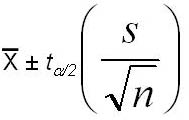

In [188]:
Image("img/ci-for-mean.JPG")

In [197]:
total_chol_mean = diabetes['total_chol'].mean()
total_chol_sd = diabetes['total_chol'].std()
total_chol_n = len(diabetes['total_chol'])
degrees_freedom = total_chol_n - 1 

In [198]:
t_alphas = stats.t(df=degrees_freedom).interval(alpha=0.95)
t_alphas

(-1.9658826616821219, 1.9658826616821219)

In [201]:
total_chol_mean - t_alphas[1]*total_chol_sd/np.sqrt(total_chol_n)

203.4891583160115

In [236]:
interval_for_mean = (total_chol_mean - t_alphas[1]*total_chol_sd/np.sqrt(total_chol_n), \
                     total_chol_mean + t_alphas[1]*total_chol_sd/np.sqrt(total_chol_n))

print 'Lower end: {}'.format(interval_for_mean[0])
print 'Middle point: {}'.format(total_chol_mean)
print 'Upper end: {}'.format(interval_for_mean[1])

Lower end: 203.489158316
Middle point: 207.836228288
Upper end: 212.18329826


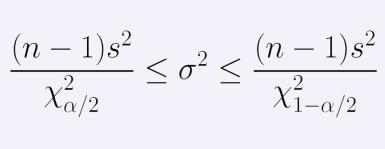

In [187]:
Image("img/confidencevariance.jpg")

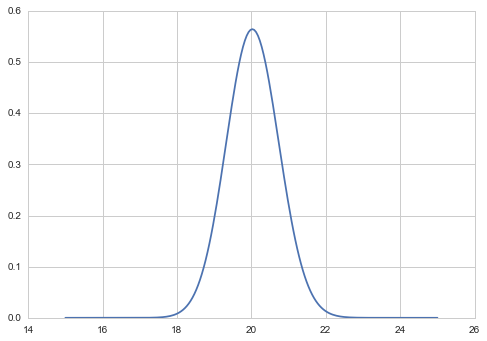

In [249]:
x = np.linspace(15,25,200)
plt.plot(x, stats.chi(df=degrees_freedom).pdf(x));

In [243]:
print stats.chi(df=degrees_freedom).ppf(0.025)**2
print stats.chi(df=degrees_freedom).ppf(0.975)**2

348.343290798
459.443963331


In [247]:
chi_alphas = stats.chi(df=degrees_freedom).interval(0.95) # This are the square roots of the above values
chi_alphas

(18.663956997335536, 21.434643998230992)

In [251]:
inteval_for_sd = (np.sqrt(degrees_freedom)*total_chol_sd/chi_alphas[1], np.sqrt(degrees_freedom)*total_chol_sd/chi_alphas[0])
print 'Lower end: {}'.format(inteval_for_sd[0])
print 'Middle point: {}'.format(total_chol_sd)
print 'Upper end: {}'.format(inteval_for_sd[1])

Lower end: 41.5229607823
Middle point: 44.3906558415
Upper end: 47.687094556


### Estimating distributions

In **parametric** inference, we specify *a priori* a suitable distribution, then choose the parameters that best fit the data.

The first step is recognixing what sort of distribution to fit our data to.

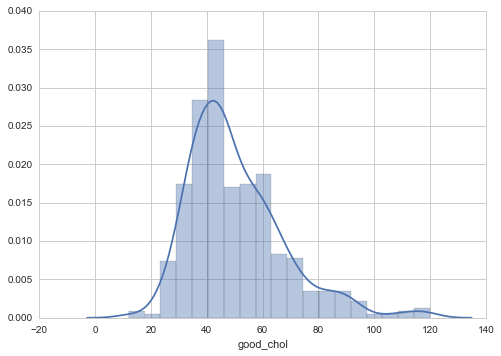

In [292]:
sns.distplot(diabetes['good_chol']);

In this example we can make a couple of observations:

1. The data are skewed, with a longer tail to the right than to the left.
2. The data are positive-valued, since they are measuring something that can only be positive.
3. The data are continuous.

There are a few possible choices, but one suitable alternative is the **gamma distribution**:

<div style="font-size: 150%;">  
$$x \sim \text{Gamma}(k, \theta) = \frac{1}{\Gamma(k)\theta^k}x^{k-1} e^{-x/\theta} $$
</div>

![gamma](http://upload.wikimedia.org/wikipedia/commons/thumb/e/e6/Gamma_distribution_pdf.svg/500px-Gamma_distribution_pdf.svg.png)

The ***method of moments*** simply assigns the empirical mean and variance to their theoretical counterparts, so that we can solve for the parameters.

So, for the gamma distribution, the mean and variance are:

<div style="font-size: 150%;">  
$$ \hat{\mu} = \bar{X} = k \theta $$
$$ \hat{\sigma}^2 = S^2 = k \theta^2 $$
</div>

So, if we solve for these parameters, we can use a gamma distribution to describe our data:

<div style="font-size: 150%;">  
$$ k = \frac{\bar{X}^2}{S^2}, \, \theta = \frac{S^2}{\bar{X}} $$
</div>

In [298]:
good_chol_mean = diabetes['good_chol'].mean()
good_chol_sd = diabetes['good_chol'].std()
k = good_chol_mean**2/good_chol_sd**2
theta = good_chol_sd**2/good_chol_mean
print k
print theta

8.55553867636
5.89492317013


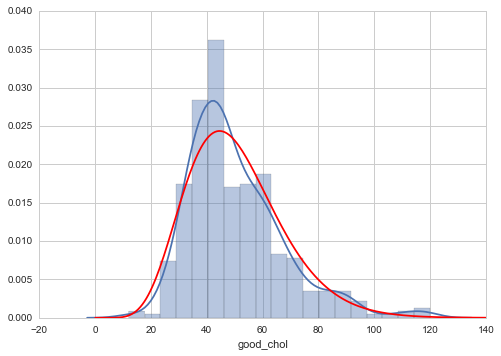

In [299]:
fig, ax = plt.subplots()
x = np.linspace(0,140,200)
sns.distplot(diabetes['good_chol'], ax=ax)
ax.plot(x, stats.gamma(a=k, scale=theta).pdf(x), color='red');

#### Levels for good cholesterol (hdl)
<table>
<tbody>
  <tr>
    <td id="C5 R9" class="VeryHigh">Less than 40 mg/dL</td>
    <td id="C6 R9" class="VeryHigh">A major risk factor for heart disease</td>
  </tr>
  <tr>
    <td id="C5 R10" class="Nearoptimal">40—59 mg/dL</td>
    <td id="C6 R10" class="Nearoptimal">The higher, the better</td>
  </tr>
  <tr>
    <td id="C5 R11" class="Optimal">60 mg/dL and higher</td>
    <td id="C6 R11" class="Optimal">Considered protective against heart disease</td>
  </tr>
</tbody>
</table>

** Conclusions of our model with respect to the population **

In [306]:
print "According to our statistical model:\n"
print "About {:0.1f}% of the population with diabetes has hdl levels that are considered \
a major risk factor for heart disease.\n".format(100*stats.gamma(a=k, scale=theta).cdf(40))
print "About {:0.1f}% of the population with diabetes has hdl levels that are considered \
normal and healthy.\n".format(100*(stats.gamma(a=k, scale=theta).cdf(60) - stats.gamma(a=k, scale=theta).cdf(40)))
print "About {:0.1f}% of the population with diabetes has hdl levels that are considered \
protective against heart disease.\n".format(100*(1-stats.gamma(a=k, scale=theta).cdf(60)))

According to our statistical model:

About 29.6% of the population with diabetes has hdl levels that are considered a major risk factor for heart disease.

About 44.2% of the population with diabetes has hdl levels that are considered normal and healthy.

About 26.2% of the population with diabetes has hdl levels that are considered protective against heart disease.



## Inferencial Statistics: Hipothesis Testing

We would like to know if the effects we see in the sample(observed data) are likely to occur in the population. 

The way classical hypothesis testing works is by conducting a statistical test to answer the following question:
> Given the sample and an effect, what is the probability of seeing that effect just by chance?

Here are the steps on how we would do this

1. Define your hypothesis
2. Choose the appropiate statistical test
3. Compute test statistic and p-value
4. Interpret the result

If p-value is very low(most often than now, below 0.05), the effect is considered statistically significant. That means that effect is unlikely to have occured by chance. The inference? The effect is likely to be seen in the population too. 

This process is very similar to the *proof by contradiction* paradigm. We first assume that the effect is false. That's the null hypothesis. Next step is to compute the probability of obtaining that effect (the p-value). If p-value is very low(<0.05 as a rule of thumb), we reject the null hypothesis. 

### Question 1: Is there a gender difference in the bad cholesterol mean levels in patients with diabetes?

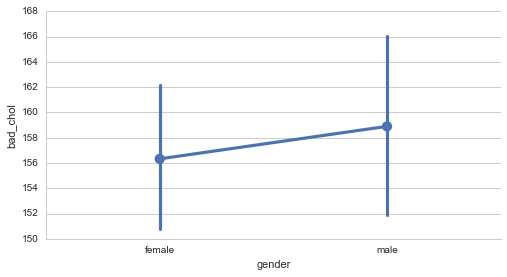

In [313]:
sns.factorplot(x='gender', y='bad_chol', data=diabetes, aspect=1.8);

### 1. Define your hypothesis
** Null Hypothesis: There is no difference between the population means of bad cholesterol levels: ($\mu_{male}=\mu_{female}$)**
** Alternative Hypothesis: There is a difference between the population means of bad cholesterol levels: ($\mu_{male}\neq\mu_{female}$)**

### 2. Choose the appropiate statistical test: verify the assumptions
1. ** Independent two-sample t-test unequal sample sizes, equal variance ** 
2. Set significance level: 5% risk of concluding that there is a difference when there is no actual difference.
3. Asumptions: Both population have distributions close to the normal distribution with equal variance.

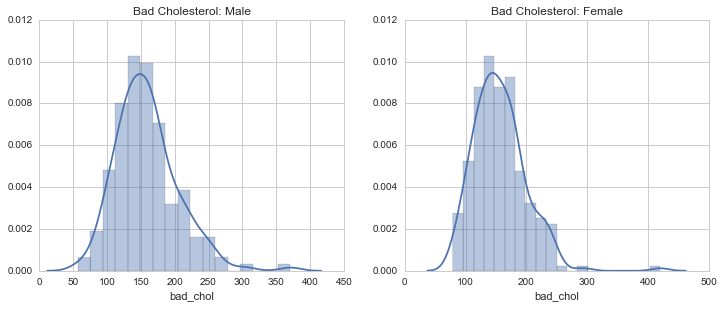

In [323]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12,4.5))
sns.distplot(diabetes['bad_chol'][diabetes['gender']=='male'], ax=ax[0])
sns.distplot(diabetes['bad_chol'][diabetes['gender']=='female'], ax=ax[1])
ax[0].set_title('Bad Cholesterol: Male')
ax[1].set_title('Bad Cholesterol: Female');

In [324]:
diabetes.groupby('gender')['bad_chol'].agg([np.mean, np.std, np.size])

,mean,std,size
gender,,,
female,156.324786,43.372492,234.0
male,158.893491,46.153605,169.0


### 3. Compute test statistic and p-value
![ttest](https://wikimedia.org/api/rest_v1/media/math/render/svg/faf70034d0a3a686080b98b32f64f2cc62a5dbad)
Where:
![sp](https://wikimedia.org/api/rest_v1/media/math/render/svg/aba44fcd32d9306b7b5883d6a89c2ff375f17d5a)

**t** is a random variable that follows a t distribution with $n_{1}+n_{2}-2$ degrees of freedom.

In [328]:
stats.ttest_ind(
    a=diabetes['bad_chol'][diabetes['gender']=='female'],
    b=diabetes['bad_chol'][diabetes['gender']=='male']   
)

Ttest_indResult(statistic=-0.57105728123142352, pvalue=0.56828070490862936)

### 4. Interpret the result:
Given that our p-value (0.5682) is greater than our pre-defined significance level (5%) we conclude that there is no evidence to reject the Null Hypothesis, we can not conclude that the population means of the variable of interest are different.

### Question 2: Is there a difference in bad cholesterol mean levels in patients with diabetes with small frame and those who don't have small frame?

In [ ]:
# 1. Define your hypothesis:
# H0: there is no difference in the population means for the two groups
# H1: there is a difference in the population means for the two groups

In [329]:
# 2. Choose the appropiate statistical test: the same as above. The assumpsions are more or less fulfilled.
diabetes.groupby(diabetes['frame']=='small')['bad_chol'].agg([np.mean, np.std, np.size])

,mean,std,size
frame,,,
False,162.722408,45.327294,299.0
True,142.105769,38.386112,104.0


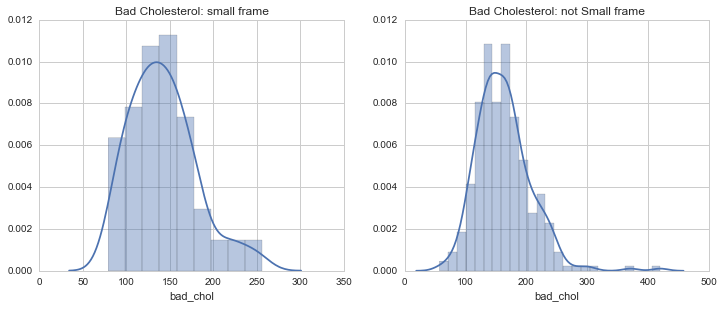

In [331]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12,4.5))
sns.distplot(diabetes['bad_chol'][diabetes['frame']=='small'], ax=ax[0])
sns.distplot(diabetes['bad_chol'][diabetes['frame']!='small'], ax=ax[1])
ax[0].set_title('Bad Cholesterol: small frame')
ax[1].set_title('Bad Cholesterol: not Small frame');

In [333]:
# 3. Compute the test statistic
stats.ttest_ind(
    a=diabetes['bad_chol'][diabetes['frame']=='small'],
    b=diabetes['bad_chol'][diabetes['frame']!='small']   
)

Ttest_indResult(statistic=-4.1489159917071987, pvalue=4.0809532247235491e-05)

#### 4. Conclusion
Given that our p-value (4.08e-05) is much(!) smaller than our pre-defined significance level (5%) we conclude that there is strong evidence to **reject** the Null Hypothesis, therefore we say that the population means of bad colesterol are different among the two groups.

### A few words of advice on hypothesis testing:

1. There are literally hundreds of hypothesis tests you have to look for the appropiate one for your problem.
2. Always verify the assumptions of the tests.
3. Other **very** important related topics are: statistical power, effect size, sample sizes, types of errors and others.
4. Avoid to give over-simplified conclusions (like the ones in our examples): provide context, discuss if the difference is not only statistically significant, but if the potential difference is important in practice (effect size).
5. There are more complex and more informative ways to do statistical inference than hypothesis testing, this is a huge topic out of the scope of this course. Keep in mind the hypothesis testing has been widely critized, use it wisely.

### Resources and References

* Probability and Statistics for Engineering and the Sciences (Devore)
* Mathematical Statistics with Applications (Wackerly, Mendenhall & Scheaffer)
* Statistical Inference (Casella & Berger)
* The Elements of Statistical Learning: Data Mining, Inference, and Prediction (Hastie, Tibshirani & Friedman)
* Scipy Stats documentaion: http://docs.scipy.org/doc/scipy/reference/stats.html
* StatModels package: http://statsmodels.sourceforge.net/stable/stats.html